In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from Prismatic_Delta import Prismatic_Delta
from mpl_toolkits.mplot3d import Axes3D

In [2]:
NUM_MOTORS = 12
NUM_AGENTS = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
BUFFER_SIZE = 20
s_p = 1.5 #side length of the platform
s_b = 4.3 #side length of the base
l = 4.5 #length of leg attached to platform

Delta = Prismatic_Delta(s_p, s_b, l)

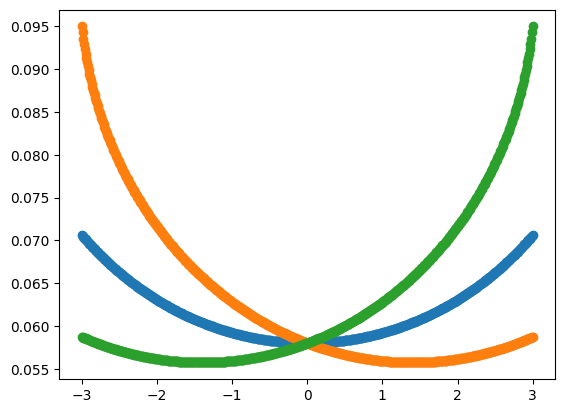

In [18]:
ptsss = []
for i in np.arange(-3, 3.01, 0.01):
    ee_pts = [i, 0, 10]
    pts = Delta.IK(ee_pts)
    pts = np.array(pts) * 0.01
    pts = np.clip(pts, 0.005, 0.095)
    ptsss.append(pts)
    
ptsss = np.array(ptsss)
# plt.figure(figsize=(10,10))
plt.plot(np.arange(-3, 3.01, 0.01), ptsss[:,0], 'o')
plt.plot(np.arange(-3, 3.01, 0.01), ptsss[:,1], 'o')
plt.plot(np.arange(-3, 3.01, 0.01), ptsss[:,2], 'o')

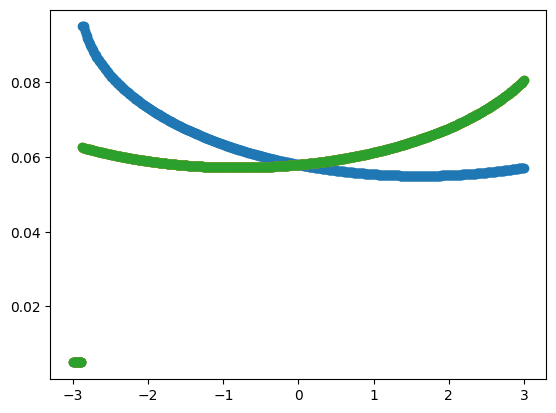

In [19]:
ptsss = []
for i in np.arange(-3, 3.01, 0.01):
    ee_pts = [0, i, 10]
    pts = Delta.IK(ee_pts)
    pts = np.array(pts) * 0.01
    pts = np.clip(pts, 0.005, 0.095)
    ptsss.append(pts)
    
ptsss = np.array(ptsss)
# plt.figure(figsize=(10,10))
plt.plot(np.arange(-3, 3.01, 0.01), ptsss[:,0], 'o')
plt.plot(np.arange(-3, 3.01, 0.01), ptsss[:,1], 'o')
plt.plot(np.arange(-3, 3.01, 0.01), ptsss[:,2], 'o')

In [ ]:
%matplotlib widget
x = np.arange(-3, 3.02, 0.02)
y = np.arange(-3, 3.02, 0.02)
z = np.arange(5.5, 13, 0.5)
X, Y, Z = np.meshgrid(x, y, z)

actuator_positions = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            ee_pts = [X[i,j,k], Y[i,j,k], Z[i,j,k]]
            ik_solution = Delta.IK(ee_pts)
            actuator_positions.append(ik_solution)

actuator_positions = np.array(actuator_positions) * 0.01

# Prepare data for plotting
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()

# Create 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot end-effector positions
scatter = ax.scatter(x_flat, y_flat, z_flat, c=actuator_positions[:,0], cmap='viridis', s=20)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('End-Effector Positions Colored by Actuator 1 Position')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Actuator 1 Position')

plt.show()

# Create separate plots for each actuator
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

for i in range(3):
    scatter = axs[i].scatter(x_flat, y_flat, z_flat, c=actuator_positions[:,i], cmap='viridis', s=20)
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].set_zlabel('Z')
    axs[i].set_title(f'End-Effector Positions Colored by Actuator {i+1} Position')
    fig.colorbar(scatter, ax=axs[i], label=f'Actuator {i+1} Position')

plt.tight_layout()
plt.show()